<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#DATA" data-toc-modified-id="DATA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#SUNY-DATA" data-toc-modified-id="SUNY-DATA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>SUNY DATA</a></span><ul class="toc-item"><li><span><a href="#Undergraduate-Enrollment" data-toc-modified-id="Undergraduate-Enrollment-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Undergraduate Enrollment</a></span></li><li><span><a href="#SUNY-Map" data-toc-modified-id="SUNY-Map-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>SUNY Map</a></span></li></ul></li><li><span><a href="#CAMPUS-VENUE-DATA" data-toc-modified-id="CAMPUS-VENUE-DATA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CAMPUS VENUE DATA</a></span><ul class="toc-item"><li><span><a href="#FOURSQUARE-Client-Params" data-toc-modified-id="FOURSQUARE-Client-Params-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>FOURSQUARE Client Params</a></span></li></ul></li><li><span><a href="#REQUEST-ALL-CAMPUS-VENUE-DATA" data-toc-modified-id="REQUEST-ALL-CAMPUS-VENUE-DATA-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>REQUEST ALL CAMPUS VENUE DATA</a></span></li></ul></li><li><span><a href="#DATA-CLEANING" data-toc-modified-id="DATA-CLEANING-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DATA CLEANING</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#SAVE-DATA" data-toc-modified-id="SAVE-DATA-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>SAVE DATA</a></span></li></ul></li></ul></li><li><span><a href="#MODEL" data-toc-modified-id="MODEL-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MODEL</a></span></li><li><span><a href="#RESULTS" data-toc-modified-id="RESULTS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>RESULTS</a></span><ul class="toc-item"><li><span><a href="#Cluster-Map" data-toc-modified-id="Cluster-Map-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cluster Map</a></span></li><li><span><a href="#Cluster-1" data-toc-modified-id="Cluster-1-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cluster 1</a></span></li><li><span><a href="#Cluster-2" data-toc-modified-id="Cluster-2-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Cluster 2</a></span></li><li><span><a href="#Cluster-3" data-toc-modified-id="Cluster-3-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Cluster 3</a></span></li><li><span><a href="#Cluster-4" data-toc-modified-id="Cluster-4-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Cluster 4</a></span></li></ul></li></ul></div>

# Introduction

<p> 
Many high school graduates often are not 100% sure how to further their education, but the State University of New York system (SUNY) does an excellent job explaining what resources their universities have to offer. A subset of these graduates will often go to Community colleges to earn a assoicates degree or credits for core classes until they have found a path that best suites them. Transfering to a 4-year university can be a a large step for a young adult, moving from their hometown to continue their higher education in another town or city.
</p>

<p>
This project aims to assit the decsion making process for prospctive transfer students by showing which schools are similar according to the venues around the campus. For example, if a student attending Dutchess Community College in southern New York wants to apply to multiple 4-year state universities, which universities can he or she expect  
</p>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# DATA

## SUNY DATA

The data is free and open, provided by New York State. The data can be found at __https://data.ny.gov/Education/State-University-of-New-York-SUNY-Campus-Locations/3cij-nwhw__

In [2]:
!wget -O SUNY_INFO.csv 'https://data.ny.gov/api/views/3cij-nwhw/rows.csv?accessType=DOWNLOAD&sorting=true'

--2020-03-29 20:06:40--  https://data.ny.gov/api/views/3cij-nwhw/rows.csv?accessType=DOWNLOAD&sorting=true
Resolving data.ny.gov (data.ny.gov)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.ny.gov (data.ny.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘SUNY_INFO.csv’

SUNY_INFO.csv           [ <=>                ]  22.80K  --.-KB/s    in 0s      

2020-03-29 20:06:40 (160 MB/s) - ‘SUNY_INFO.csv’ saved [23348]



In [3]:
suny_data = pd.read_csv('SUNY_INFO.csv')

This dataset has many variables, but for the scope of this project, we only need a few:
- Campus Name
- Latitude
- Longitude
- Undergardate Enrollment 
- City

In [4]:
def clean_data(df):
    
    suny = df[df['Institution Level'] == '4-year']
    
    suny = suny[['Campus Name', 'Latitude1', 'Longitude1', 'Undergraduate Enrollment', 'City']]
    suny.columns = ['Campus', 'Latitude', 'Longitude', 'Undergraduate Enrollment', 'City']
    
    suny.set_index('Campus', inplace = True)
    
    campus_to_drop = ["Downstate Medical", "Upstate Medical", "Alfred-Ceramics",
    'Fashion Institute', 'Maritime']
    
    suny = suny.drop(labels= campus_to_drop, axis = 0)
    
    return suny

suny = clean_data(suny_data)

### Undergraduate Enrollment

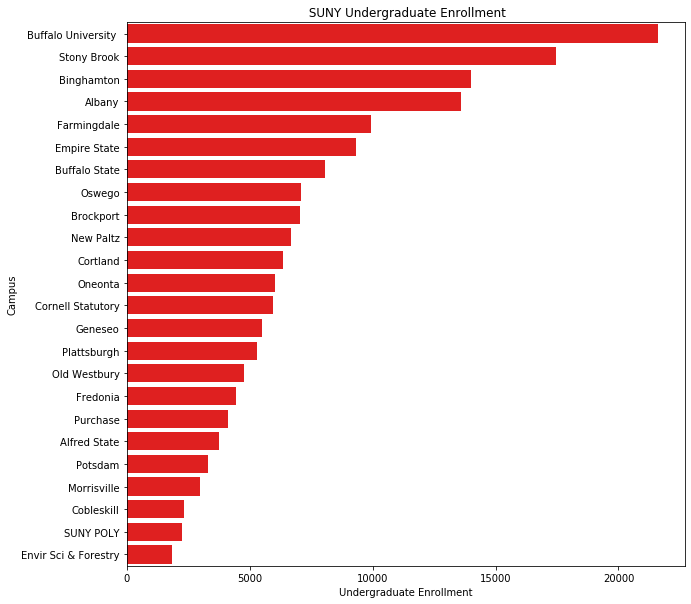

In [5]:
def undergrad_plot(df):
    undergrad_sorted = df.sort_values('Undergraduate Enrollment', ascending = False).reset_index()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.barplot(x="Undergraduate Enrollment", y="Campus", data=undergrad_sorted, 
        label="Total", color="r").set_title(" SUNY Undergraduate Enrollment")
    return 

undergrad_plot(suny)

###  SUNY Map

In [6]:
ny_latitude = 42.730610
ny_longitude = -75.835
ny_zoom = 7
map_tiles = 'CartoDB positron'

def suny_map(suny):
    # create map of New York using latitude and longitude values
    suny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=ny_zoom, tiles=map_tiles)

    # add markers to map
    for lat, lng, name, undergrad in zip(suny['Latitude'], suny['Longitude'], suny.index, suny['Undergraduate Enrollment']):
        label = '{}: {}'.format(name,  undergrad)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='grey',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(suny_map)  

    return suny_map

suny_map(suny)

Drop any campus in New york city since CUNY schools would need to be done seperaelty

## CAMPUS VENUE DATA

### FOURSQUARE Client Params

In [7]:
with open('safe.json') as f:
    data = json.load(f)
    CLIENT_ID = data['client_id']
    CLIENT_SECRET = data['client_password']
    VERSION = data['version']

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('VERSION:' + VERSION)

Your credentails:
CLIENT_ID: 0BV0V0GOBEIOVT0MRXMTB0KWJQ4XMJPQ1IZPT1MKJY225P24
CLIENT_SECRET:MVTHTCREBFUDB4UPFWWGNQS0CFL5XWR2ENXIZBPQPZDMOHTG
VERSION:20180604


## REQUEST ALL CAMPUS VENUE DATA

In [8]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        LIMIT = 50
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Campus', 
                  'Campus Latitude', 
                  'Campus Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
suny_venues = getNearbyVenues(names=suny.index,
                                   latitudes=suny['Latitude'],
                                   longitudes=suny['Longitude']
                                  )



Empire State
Buffalo State
Alfred State
Buffalo University 
Albany
Brockport
Morrisville
New Paltz
Cornell Statutory
Geneseo
Plattsburgh
Cobleskill
Stony Brook
Cortland
Oswego
Fredonia
SUNY POLY
Purchase
Binghamton
Potsdam
Farmingdale
Envir Sci & Forestry
Old Westbury
Oneonta


In [10]:
print(suny_venues.shape)
suny_venues.head()

(1002, 7)


,Campus,Campus Latitude,Campus Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Empire State,43.077381,-73.78331,Congress Park,43.078339,-73.784308,Park
1,Empire State,43.077381,-73.78331,Sweet Mimi's,43.080408,-73.783377,Café
2,Empire State,43.077381,-73.78331,Druthers Brew Pub,43.080911,-73.786316,Brewery
3,Empire State,43.077381,-73.78331,Ravenous,43.080599,-73.784885,French Restaurant
4,Empire State,43.077381,-73.78331,Northshire Bookstore,43.081952,-73.785192,Bookstore


In [11]:
suny_venues.groupby('Campus').count()

,Campus Latitude,Campus Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Campus,,,,,,
Albany,50,50,50,50,50,50
Alfred State,13,13,13,13,13,13
Binghamton,50,50,50,50,50,50
Brockport,41,41,41,41,41,41
Buffalo State,50,50,50,50,50,50
Buffalo University,50,50,50,50,50,50
Cobleskill,26,26,26,26,26,26
Cornell Statutory,50,50,50,50,50,50
Cortland,50,50,50,50,50,50


In [12]:
print('There are {} uniques categories.'.format(len(suny_venues['Venue Category'].unique())))

There are 207 uniques categories.


# DATA CLEANING

In [13]:
suny_onehot = pd.get_dummies(suny_venues[['Venue Category']], prefix="", prefix_sep="")
#suny_onehot.drop(columns = ['Campus'], inplace = True)

# add neighborhood column back to dataframe
suny_onehot['Campus'] = suny_venues['Campus']

# move neighborhood column to the first column
fixed_columns = [suny_onehot.columns[-1]] + list(suny_onehot.columns[:-1])
suny_onehot = suny_onehot[fixed_columns]

suny_onehot.head()

,Campus,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bike Trail,Bistro,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Butcher,Café,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Hockey Rink,College Quad,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Electronics Store,Event Service,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Lawyer,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Multiplex,Museum,Music Store,Nature Preserve,New American Restaurant,Organic Grocery,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Racetrack,Record Shop,Recycling Facility,Rental Car Location,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Empire State,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Empire State,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Empire State,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [14]:
suny_onehot.shape

(1002, 208)

In [15]:
suny_grouped = suny_onehot.groupby('Campus').mean().reset_index()
suny_grouped

,Campus,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bike Trail,Bistro,Bookstore,Botanical Garden,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Butcher,Café,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Administrative Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Hockey Rink,College Quad,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Electronics Store,Event Service,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Lawyer,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Multiplex,Museum,Music Store,Nature Preserve,New American Restaurant,Organic Grocery,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Racetrack,Record Shop,Recycling Facility,Rental Car Location,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany,0.02,0.000000,0.000000,0.000000,0.100000,0.00,0.00,0.00,0.000000,0.02,0.00,0.000000,0.00,0.000000,0.000000,0.040000,0.000000,0.020000,0.000000,0.00,0.00,0.00,0.00,0.00000,0.00,0.00,0.00,0.040000,0.00,0.000000,0.00,0.000000,0.02000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.040000,0.000000,0.060000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.02,0.000000,0.02,0.00,0.00,0.000000,0.000000,0.08,0.00,0.00,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.02,0.000000,0.04,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.00,0.00,0.00,0.00,0.000000,0.020000,0.00,0.040000,0.00,0.00,0.00,0.020000,0.000000,0.00,0.00,0.02,0.00,0.000000,0.00,0.00,0.000000,0.00,0.02,0.020000,0.000000,0.00,0.02,0.00,0.020000,0.00,0.00,0.00,0.00,0.020000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0

In [16]:
suny_grouped.shape

(24, 208)

In [17]:
suny_grouped.Campus.tolist()

['Albany',
 'Alfred State',
 'Binghamton',
 'Brockport',
 'Buffalo State',
 'Buffalo University ',
 'Cobleskill',
 'Cornell Statutory',
 'Cortland',
 'Empire State',
 'Envir Sci & Forestry',
 'Farmingdale',
 'Fredonia',
 'Geneseo',
 'Morrisville',
 'New Paltz',
 'Old Westbury',
 'Oneonta',
 'Oswego',
 'Plattsburgh',
 'Potsdam',
 'Purchase',
 'SUNY POLY',
 'Stony Brook']

In [18]:
suny_grouped.drop(suny_grouped[suny_grouped['Campus'] == 'Morrisville'].index, inplace = True)

In [19]:
num_top_venues = 5

for campus in suny_grouped['Campus']:
    print("----"+campus+"----")
    temp = suny_grouped[suny_grouped['Campus'] == campus].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany----
                 venue  freq
0  American Restaurant  0.10
1       Cosmetics Shop  0.08
2          Coffee Shop  0.06
3               Bakery  0.04
4       Sandwich Place  0.04


----Alfred State----
            venue  freq
0           Diner  0.15
1          Garden  0.08
2  Sandwich Place  0.08
3   Movie Theater  0.08
4            Food  0.08


----Binghamton----
                  venue  freq
0    Mexican Restaurant  0.06
1        Sandwich Place  0.06
2           Pizza Place  0.04
3           Coffee Shop  0.04
4  Gym / Fitness Center  0.04


----Brockport----
                  venue  freq
0           Pizza Place  0.12
1  Fast Food Restaurant  0.07
2          Burger Joint  0.05
3                 Hotel  0.05
4          Liquor Store  0.05


----Buffalo State----
                 venue  freq
0  American Restaurant  0.08
1     Greek Restaurant  0.06
2                 Café  0.06
3          Pizza Place  0.04
4          Art Gallery  0.04


----Buffalo University ----
               

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Campus']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
campus_venues_sorted = pd.DataFrame(columns=columns)
campus_venues_sorted['Campus'] = suny_grouped['Campus']

for ind in np.arange(suny_grouped.shape[0]):
    campus_venues_sorted.iloc[ind, 1:] = return_most_common_venues(suny_grouped.iloc[ind, :], num_top_venues)

campus_venues_sorted.head()



,Campus,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany,American Restaurant,Cosmetics Shop,Coffee Shop,Clothing Store,Furniture / Home Store,Ice Cream Shop,Shopping Mall,Bookstore,Bakery,Sandwich Place
1,Alfred State,Diner,Bar,Discount Store,Fast Food Restaurant,Sandwich Place,Japanese Restaurant,Garden,Café,Movie Theater,American Restaurant
2,Binghamton,Sandwich Place,Mexican Restaurant,Gym / Fitness Center,Pizza Place,Coffee Shop,Ice Cream Shop,Bar,Bakery,Korean Restaurant,Comfort Food Restaurant
3,Brockport,Pizza Place,Fast Food Restaurant,Burger Joint,Liquor Store,Sandwich Place,Bank,Hotel,Video Store,Bar,Recycling Facility
4,Buffalo State,American Restaurant,Greek Restaurant,Café,New American Restaurant,Pizza Place,Bar,Art Gallery,Thai Restaurant,Sausage Shop,Juice Bar


### SAVE DATA

In [22]:
pd.to_pickle(campus_venues_sorted, 'campus_venues_sorted.pkl')

# MODEL

In [119]:
# LOAD SAVED DATA
campus_venues_sorted = pd.read_pickle('campus_venues_sorted.pkl')

# set number of clusters
kclusters = 4

suny_grouped_clustering = suny_grouped.drop('Campus', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(suny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 1, 0, 1, 3, 0, 1, 0], dtype=int32)

In [120]:
# add clustering labels
campus_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)
campus_venues_sorted.set_index('Campus', inplace = True)

suny_merged = suny[[ 'Latitude', 'Longitude']]

suny_merged = suny_merged.join(campus_venues_sorted)

suny_merged.dropna(axis=0, inplace = True)
suny_merged['Cluster Labels'] = suny_merged['Cluster Labels'].astype('int')

suny_merged.head() # check the last columns!

,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Campus,,,,,,,,,,,,,
Empire State,43.077381,-73.783310,0,American Restaurant,Hotel,Coffee Shop,Lounge,Italian Restaurant,Bar,Tea Room,Burger Joint,Wine Bar,Brewery
Buffalo State,42.932419,-78.876892,0,American Restaurant,Greek Restaurant,Café,New American Restaurant,Pizza Place,Bar,Art Gallery,Thai Restaurant,Sausage Shop,Juice Bar
Alfred State,42.255505,-77.787689,2,Diner,Bar,Discount Store,Fast Food Restaurant,Sandwich Place,Japanese Restaurant,Garden,Café,Movie Theater,American Restaurant
Buffalo University,43.000828,-78.788864,1,Café,Hotel,Coffee Shop,Sandwich Place,Gym,Pizza Place,Mexican Restaurant,Italian Restaurant,Clothing Store,Bike Trail
Albany,42.690784,-73.823296,0,American Restaurant,Cosmetics Shop,Coffee Shop,Clothing Store,Furniture / Home Store,Ice Cream Shop,Shopping Mall,Bookstore,Bakery,Sandwich Place


# RESULTS

## Cluster Map

In [121]:
# create map
map_clusters = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=ny_zoom, tiles=map_tiles)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(suny_merged['Latitude'], suny_merged['Longitude'], suny_merged.index, suny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=.7).add_to(map_clusters)
       
map_clusters

In [122]:
import squarify
from wordcloud import WordCloud 

def cluster_info(data, cluster):
    return data.loc[data['Cluster Labels'] == cluster, data.columns[list(range(3, data.shape[1]))]]
    
def clusterMelt(data, n, norm = False):
    df = pd.DataFrame(data.melt()['value'].value_counts()/ data.shape[0])
    
    if not norm:
        return df 
    else:
        return df.head(n).sort_values(by = 'value',ascending = True)

## Cluster 1

In [123]:
cluster1 = cluster_info(suny_merged, 0)
cluster1

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Campus,,,,,,,,,,
Empire State,American Restaurant,Hotel,Coffee Shop,Lounge,Italian Restaurant,Bar,Tea Room,Burger Joint,Wine Bar,Brewery
Buffalo State,American Restaurant,Greek Restaurant,Café,New American Restaurant,Pizza Place,Bar,Art Gallery,Thai Restaurant,Sausage Shop,Juice Bar
Albany,American Restaurant,Cosmetics Shop,Coffee Shop,Clothing Store,Furniture / Home Store,Ice Cream Shop,Shopping Mall,Bookstore,Bakery,Sandwich Place
New Paltz,Coffee Shop,Mexican Restaurant,Record Shop,Bar,American Restaurant,Deli / Bodega,Gift Shop,Vegetarian / Vegan Restaurant,Pizza Place,French Restaurant
Cornell Statutory,Coffee Shop,Bagel Shop,Sandwich Place,Trail,Ice Cream Shop,Hotel Bar,College Gym,American Restaurant,Mexican Restaurant,Café
Plattsburgh,American Restaurant,Pizza Place,Diner,Sandwich Place,Café,Bar,Bakery,Supermarket,Coffee Shop,Restaurant
Stony Brook,Bar,Coffee Shop,Chinese Restaurant,Bagel Shop,Gourmet Shop,American Restaurant,Pharmacy,Pizza Place,Burrito Place,Event Service
Purchase,Rental Car Location,Golf Course,Deli / Bodega,Italian Restaurant,Coffee Shop,Trail,Restaurant,Resort,Japanese Restaurant,Baseball Field
Binghamton,Sandwich Place,Mexican Restaurant,Gym / Fitness Center,Pizza Place,Coffee Shop,Ice Cream Shop,Bar,Bakery,Korean Restaurant,Comfort Food Restaurant


(-0.5, 999.5, 499.5, -0.5)

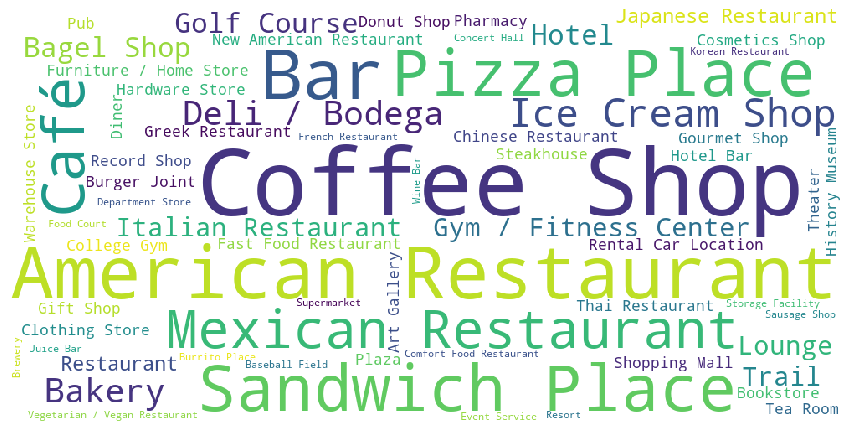

In [124]:
from collections import Counter
word_could_dict=Counter(cluster1.melt()['value'].values)
wordcloud = WordCloud(background_color ='white', 
                      width = 1000, 
                      height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

Text(0.5, 1.0, 'Cluster 1')

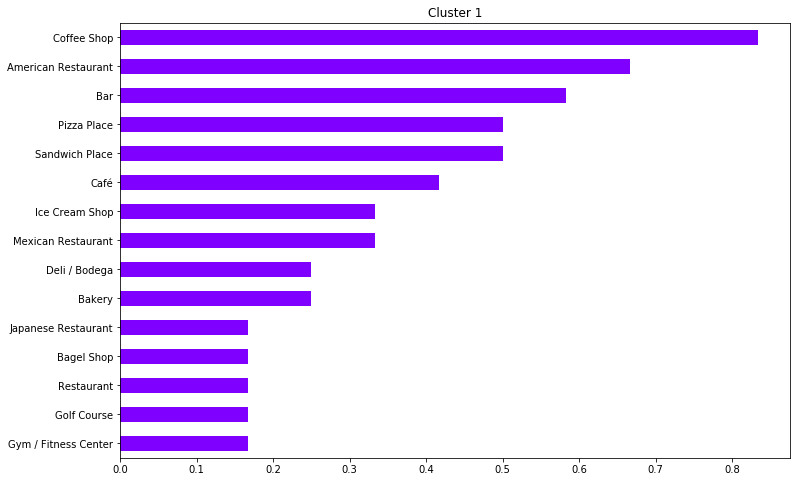

In [125]:
clusterMelt(cluster1, 15, norm = True).plot(figsize = (12,8),
                                            kind = 'barh' , 
                                            color = rainbow[0], 
                                            legend = False).set_title("Cluster 1")

## Cluster 2

In [126]:
cluster2 = cluster_info(suny_merged, 1)
cluster2

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Campus,,,,,,,,,,
Buffalo University,Café,Hotel,Coffee Shop,Sandwich Place,Gym,Pizza Place,Mexican Restaurant,Italian Restaurant,Clothing Store,Bike Trail
Brockport,Pizza Place,Fast Food Restaurant,Burger Joint,Liquor Store,Sandwich Place,Bank,Hotel,Video Store,Bar,Recycling Facility
Geneseo,Clothing Store,Fast Food Restaurant,Pizza Place,Bar,Hot Dog Joint,Park,Coffee Shop,Restaurant,College Cafeteria,Pet Store
Cortland,Pizza Place,Bar,Diner,Coffee Shop,American Restaurant,Bakery,Discount Store,Sandwich Place,Italian Restaurant,Pub
Oswego,Pizza Place,Sandwich Place,Lake,Italian Restaurant,Japanese Restaurant,College Administrative Building,Mexican Restaurant,Diner,Campground,Sports Bar
Fredonia,Pizza Place,Bar,Coffee Shop,Mobile Phone Shop,Sandwich Place,Discount Store,Italian Restaurant,Liquor Store,Supplement Shop,Big Box Store
SUNY POLY,Bar,Pizza Place,Chinese Restaurant,Donut Shop,Pharmacy,Breakfast Spot,American Restaurant,Discount Store,Brewery,Middle Eastern Restaurant
Potsdam,Fast Food Restaurant,Coffee Shop,Diner,Convenience Store,Sandwich Place,Pizza Place,Hotel,Bar,Italian Restaurant,Discount Store
Oneonta,Italian Restaurant,Café,Coffee Shop,Pizza Place,Park,Bar,Discount Store,Pharmacy,College Gym,Bookstore


(-0.5, 999.5, 499.5, -0.5)

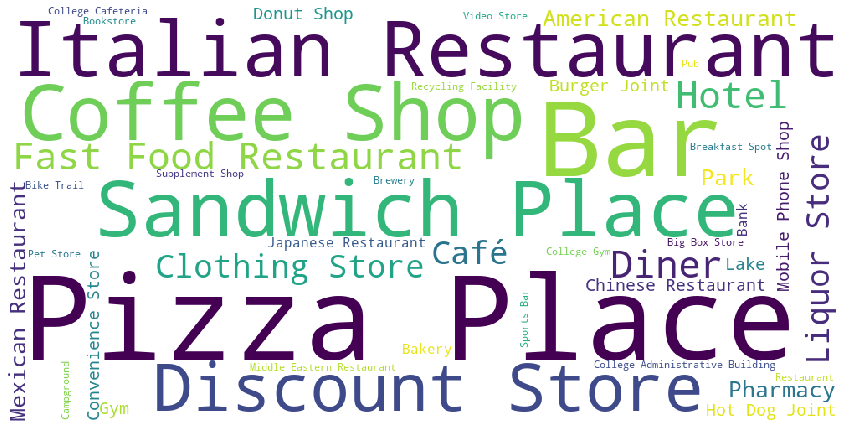

In [127]:
from collections import Counter
word_could_dict=Counter(cluster2.melt()['value'].values)
wordcloud = WordCloud(background_color ='white', 
                      width = 1000, 
                      height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

Text(0.5, 1.0, 'Cluster 2')

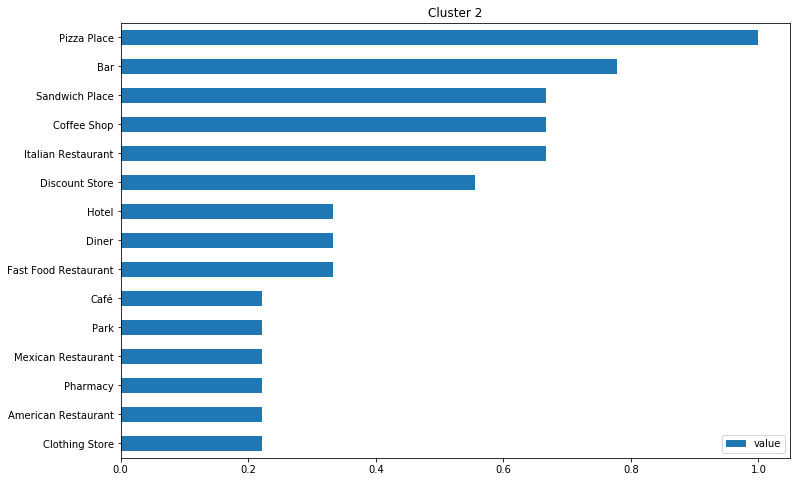

In [128]:
clusterMelt(cluster2, 15, norm = True).plot(kind = 'barh',
                                           figsize = (12,8)).set_title('Cluster 2')

## Cluster 3

In [129]:
cluster3 = cluster_info(suny_merged, 2)

(-0.5, 999.5, 499.5, -0.5)

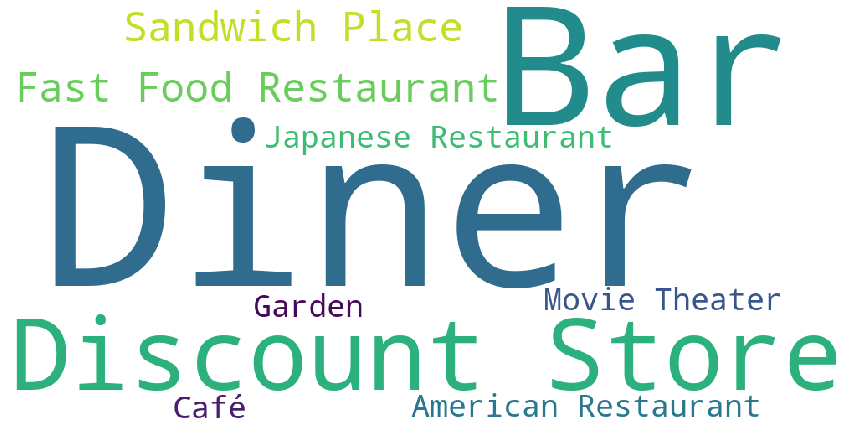

In [130]:
from collections import Counter
word_could_dict=Counter(cluster3.melt()['value'].values)
wordcloud = WordCloud(background_color ='white', 
                      width = 1000, 
                      height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

Text(0.5, 1.0, 'Cluster 3')

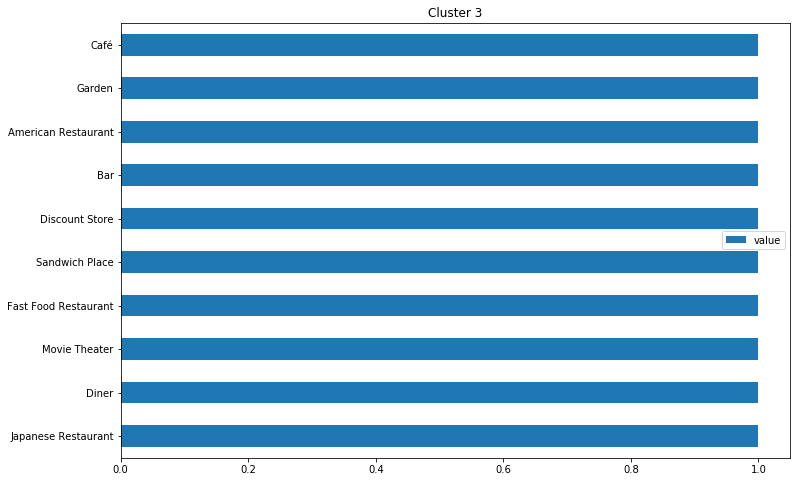

In [131]:
clusterMelt(cluster3, 10, norm = True).plot(kind = 'barh',
                                           figsize = (12,8)).set_title('Cluster 3')

## Cluster 4

In [132]:
cluster4 = suny_merged.loc[suny_merged['Cluster Labels'] == 3, suny_merged.columns[list(range(3, suny_merged.shape[1]))]]
cluster4

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Campus,,,,,,,,,,
Cobleskill,Fast Food Restaurant,Pizza Place,Pharmacy,Ice Cream Shop,Fried Chicken Joint,Sports Bar,Convenience Store,BBQ Joint,Diner,Discount Store


(-0.5, 999.5, 499.5, -0.5)

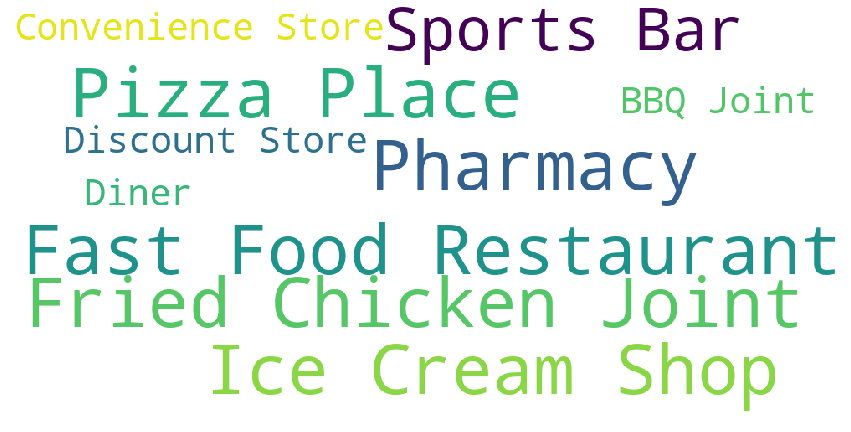

In [133]:
from collections import Counter
word_could_dict=Counter(cluster4.melt()['value'].values)
wordcloud = WordCloud(background_color ='white', 
                      width = 1000, 
                      height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

Text(0.5, 1.0, 'Cluster 4')

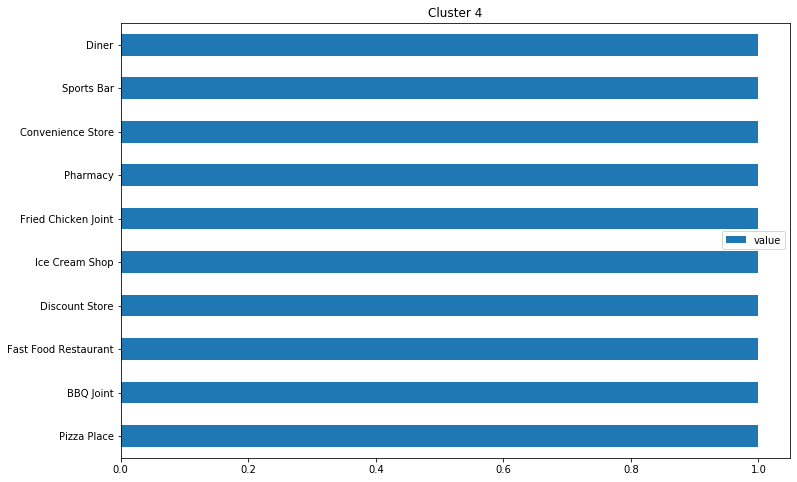

In [135]:
clusterMelt(cluster4, 10, norm = True).plot(kind = 'barh',
                                           figsize = (12,8)).set_title('Cluster 4')